In [0]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

from tensorflow.python.keras.layers import Embedding, Activation, Dense, Dropout, Conv1D, MaxPooling1D, LSTM, Dropout
from tensorflow.python.keras.models import Sequential

from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

In [0]:
train_text=pd.read_csv('./train_raw_sentences.csv',dtype='str')
test_text=pd.read_csv('./test_raw_sentences.csv',dtype='str')

train_labels=pd.read_csv('./train_labels.csv')
test_labels=pd.read_csv('./test_labels.csv')

In [0]:
train_text.columns=['Text']
train_text.head()

test_text.columns=['Text']
test_text.head()

train_labels.columns=['Label']
test_labels.columns=['Label']

train=pd.concat([train_text,train_labels],axis=1)
test=pd.concat([test_text,test_labels],axis=1)

In [0]:
# Set parameters
batch_size=32
embedding_dims=50
max_features=20000
maxlen=50
filters=250
kernel_size=5
hidden_dims=250
epochs=10

In [0]:
# Try deep learning
model = Sequential()
model.add(Embedding(max_features,\
                    embedding_dims,\
                    input_length=maxlen))

model.add(Dropout(0.2))

model.add(Conv1D(filters,\
                 kernel_size,\
                 activation='relu'))

model.add(MaxPooling1D(pool_size=4))

model.add(LSTM(100))

model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))

model.add(Dense(1, activation='sigmoid'))

In [34]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 50, 50)            1000000   
_________________________________________________________________
dropout_4 (Dropout)          (None, 50, 50)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 46, 250)           62750     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 11, 250)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               140400    
_________________________________________________________________
dense_4 (Dense)              (None, 250)               25250     
_________________________________________________________________
dropout_5 (Dropout)          (None, 250)              

In [0]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
]

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=METRICS)

In [36]:
train['Text'].shape

(103872,)

In [0]:
train_text_1=train.Text.apply(str)

In [0]:
vocabulary_size = 20000
tokenizer = Tokenizer(num_words= vocabulary_size)
tokenizer.fit_on_texts(train_text_1)

sequences = tokenizer.texts_to_sequences(train_text_1)

X_data = pad_sequences(sequences, maxlen=50)

In [39]:
X_data[:4]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1,
         482,  160, 2123,   32,    4,    1, 1703,  249,    8, 1937,   37,
          67,   44,    1, 7494, 1100,    2, 2163,    9,  132,  117,  373,
          12,  327, 2123,   18,   12,  367,   29,    7,   18,    5,   29,
          10,    7, 9822,   56,  229, 1696],
       [ 830,   11, 3668,   67,   25,  117,  479,    5,   23,    4, 1673,
           6,    9,  145, 1899,  185,  230,  151, 7899, 3271,    2, 1336,
           9,   11,  542,   72,   44,  390, 1643, 9592,   16,  101, 6521,
        5142, 1607,    3,  323,    6, 6607, 2749, 1400,   16,   42,   25,
         160,   47,   54, 1733,   16,  575],
       [   5,  331,   39, 1473,   34,    3,  765,    4,   47,  331,   39,
          23, 1897, 1473,   34,   15, 1251,  245,   15,  263,   67,   23,
          25,  452,    2,  973,    2,    3, 1603,  249,   47,  331,  204,
           2,   15, 1073,   80,  546,   43, 3846,    2,  130,  109,    9,
        2613, 8014,  4

In [40]:
train['Label']

0         1
1         1
2         1
3         1
4         1
         ..
103867    1
103868    1
103869    1
103870    1
103871    1
Name: Label, Length: 103872, dtype: int64

In [71]:
history=model.fit(X_data, train['Label'],
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.3)

Epoch 1/10
2273/2273 [==============================] - 136s 60ms/step - loss: 0.0075 - accuracy: 0.9971 - precision: 0.9949 - recall: 0.9949 - auc: 0.9998 - val_loss: 0.0411 - val_accuracy: 0.9917 - val_precision: 1.0000 - val_recall: 0.9917 - val_auc: 0.0000e+00
Epoch 2/10
2273/2273 [==============================] - 137s 60ms/step - loss: 0.0059 - accuracy: 0.9974 - precision: 0.9962 - recall: 0.9949 - auc: 0.9999 - val_loss: 0.0257 - val_accuracy: 0.9956 - val_precision: 1.0000 - val_recall: 0.9956 - val_auc: 0.0000e+00
Epoch 3/10
2273/2273 [==============================] - 137s 60ms/step - loss: 0.0058 - accuracy: 0.9976 - precision: 0.9961 - recall: 0.9956 - auc: 0.9999 - val_loss: 0.0559 - val_accuracy: 0.9931 - val_precision: 1.0000 - val_recall: 0.9931 - val_auc: 0.0000e+00
Epoch 4/10
2273/2273 [==============================] - 138s 61ms/step - loss: 0.0049 - accuracy: 0.9977 - precision: 0.9965 - recall: 0.9955 - auc: 0.9999 - val_loss: 0.0637 - val_accuracy: 0.9922 - val_p

In [0]:
test_text_1=test.Text.apply(str)

tokenizer.fit_on_texts(test_text_1)

test_sequences = tokenizer.texts_to_sequences(test_text_1)
X_test = pad_sequences(test_sequences, maxlen=50)

In [61]:
score = model.evaluate(X_test, test['Label'],
                       batch_size=256, verbose=1)

46/46 [==============================] - 2s 54ms/step - loss: 2.4628 - tp: 4328.0000 - fp: 2164.0000 - tn: 3586.0000 - fn: 1465.0000 - accuracy: 0.6856 - precision: 0.6667 - recall: 0.7471 - auc: 0.7249


In [0]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

def plot_metrics(history):
  metrics =  ['loss', 'precision', 'recall', 'auc']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

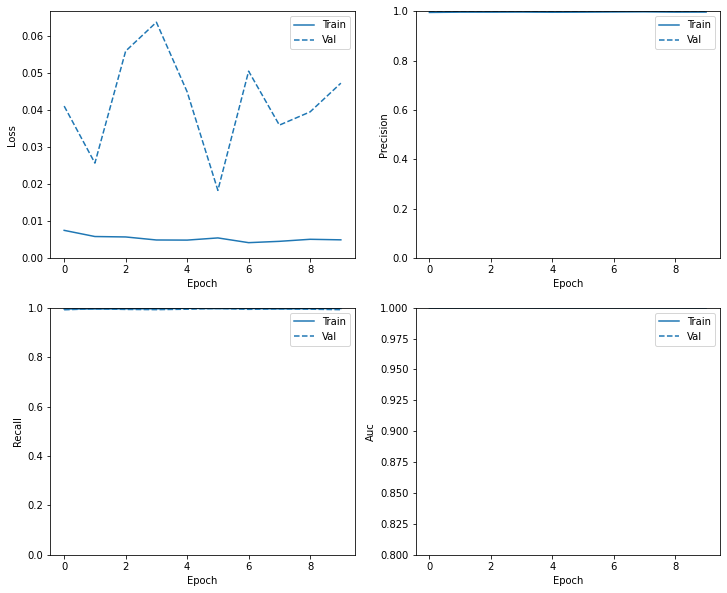

In [73]:
plot_metrics(history)